In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
print("Tensorflow version", tf.__version__)

Tensorflow version 2.6.0


In [2]:
train = pd.read_csv("train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [5]:
train.shape

(42000, 785)

In [6]:
print("Q: Are there any missing values in training data?", "\n" +
      "A: {}".format(train.isna().values.any()))

Q: Are there any missing values in training data? 
A: False


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
# Extract features
features = train.drop('label', axis=1)

# Extract label
label = train['label']

In [9]:
# Train images
features = np.array(features)

In [10]:
features.shape

(42000, 784)

In [11]:
features_reshaped = features.reshape(42000, 28, 28)  # it 28, 28  because 28 X 28 = 784!

In [12]:
# Test images
test = np.array(test)
test.shape

(28000, 784)

In [13]:
print('Training Dataset Shape: {}'.format(features_reshaped.shape))
print()
print('Testing Dataset Shape: {}'.format(test.shape))         # We will hold on the test dataset for now ...

Training Dataset Shape: (42000, 28, 28)

Testing Dataset Shape: (28000, 784)


In [14]:
np.min(features_reshaped)

0

In [15]:
np.max(features_reshaped)

255

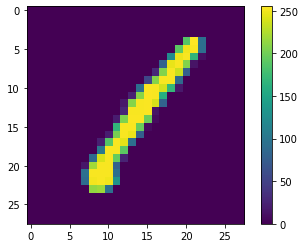

In [16]:
plt.figure()
plt.imshow(features_reshaped[0])
plt.colorbar()
plt.show()

In [17]:
features_norm = features_reshaped / 255.0        # Scaled from [0 to 1]

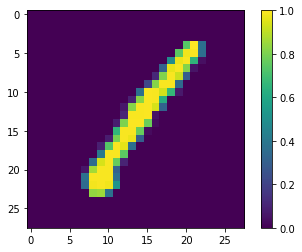

In [18]:
plt.figure()
plt.imshow(features_norm[0])
plt.colorbar()
plt.show()

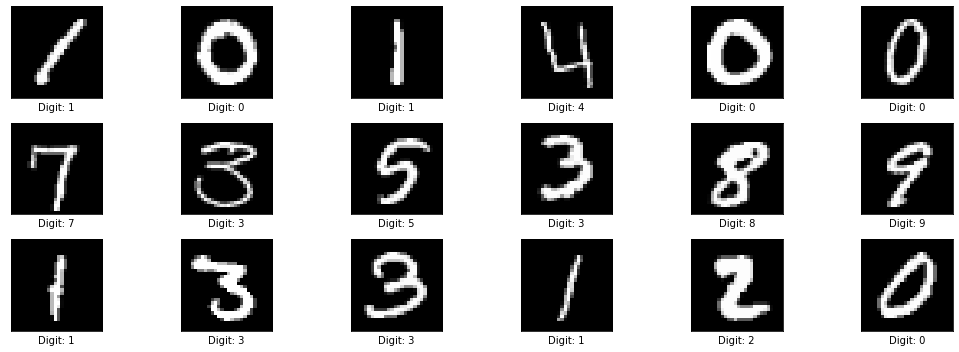

In [19]:
fig = plt.figure(figsize=(16,5))

for images in range(18):
    fig.add_subplot(3, 6, images+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features_norm[images], cmap="gray")
    plt.xlabel('Digit: ' + str(label[images]))
    plt.tight_layout() # to see clear graph
plt.show();

In [20]:
features_norm.shape

(42000, 28, 28)

In [21]:
X = features_norm
y = label

In [22]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((33600, 28, 28), (8400, 28, 28), (33600,), (8400,))

In [23]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum 
test_norm = test / 255.0
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28,1)

In [24]:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation="relu"),  
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")   # for multiclass classification,  #10 is the number of classes
])



#2 Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

################################### excuse me please ###################################
# Load the TensorBoard notebook extension
import  datetime
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
########################################################################################

# 3. Fit the model
history_data = model.fit(X_train, y_train, batch_size=50, epochs=30, callbacks=[tensorboard_callback])

Epoch 1/30


C:\Users\Maxie\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


672/672 [==============================] - 19s 24ms/step - loss: 0.2876 - accuracy: 0.9130
Epoch 2/30
672/672 [==============================] - 11s 16ms/step - loss: 0.1650 - accuracy: 0.95280s - loss: 0.1649 - accuracy: 
Epoch 3/30
672/672 [==============================] - 14s 20ms/step - loss: 0.1446 - accuracy: 0.9605
Epoch 4/30
672/672 [==============================] - 13s 19ms/step - loss: 0.1254 - accuracy: 0.9651
Epoch 5/30
672/672 [==============================] - 12s 18ms/step - loss: 0.1163 - accuracy: 0.9691
Epoch 6/30
672/672 [==============================] - 12s 18ms/step - loss: 0.1041 - accuracy: 0.9722
Epoch 7/30
672/672 [==============================] - 12s 17ms/step - loss: 0.1045 - accuracy: 0.9724
Epoch 8/30
672/672 [==============================] - 12s 19ms/step - loss: 0.0938 - accuracy: 0.9762
Epoch 9/30
672/672 [==============================] - 12s 18ms/step - loss: 0.0925 - accuracy: 0.9769
Epoch 10/30
672/672 [==============================] - 13s 19ms

In [25]:
model.evaluate(X_valid, y_valid)

263/263 [==============================] - 2s 6ms/step - loss: 0.2996 - accuracy: 0.9675


[0.2995870113372803, 0.9674999713897705]

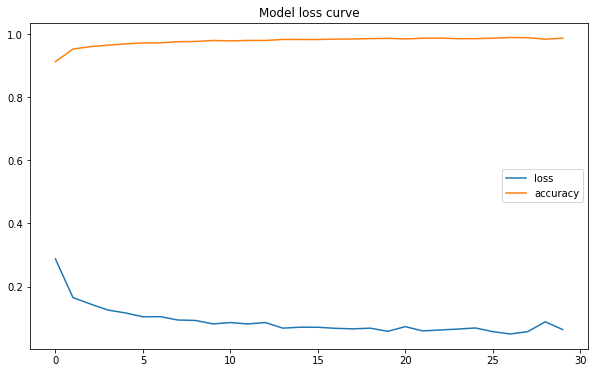

In [26]:
# Plot the loss curves
#plt.figure(figsize=(12, 6))
pd.DataFrame(history_data.history).plot(figsize=(10, 6))
plt.title("Model loss curve")
plt.show()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


**For deep dive analysis, we turn to `Tensorboard!`**

In [28]:
################### excuse me please ####################
%tensorboard --logdir logs/fit
#########################################################

In [29]:
y_prob = model.predict(X_valid)
y_prob[:3]

array([[2.1434809e-17, 1.7295242e-14, 4.8600867e-12, 3.5095370e-14,
        1.8608914e-15, 9.3020329e-21, 3.6175568e-19, 3.3433611e-25,
        1.0000000e+00, 2.3526462e-16],
       [0.0000000e+00, 1.0000000e+00, 1.0041833e-35, 3.6791248e-27,
        1.4844876e-14, 0.0000000e+00, 1.9456171e-18, 8.1991845e-22,
        1.0023406e-16, 5.1089550e-26],
       [3.1790297e-34, 4.5813574e-23, 0.0000000e+00, 7.2496703e-17,
        2.8211626e-12, 4.5563168e-21, 0.0000000e+00, 3.3795847e-18,
        3.4277953e-32, 1.0000000e+00]], dtype=float32)

In [30]:
# Convert all of the prediction probabilities into integers
y_preds = y_prob.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_valid, y_pred=y_preds)

array([[795,   0,   1,   0,   0,   1,   4,   1,   6,   8],
       [  0, 891,   2,   1,   0,   1,   1,   0,  11,   2],
       [  2,   2, 813,   4,   7,   0,   1,   1,   6,  10],
       [  1,   0,   3, 914,   0,   4,   0,   1,   6,   8],
       [  2,   0,   0,   0, 818,   0,   4,   0,   2,  13],
       [  1,   0,   0,  13,   2, 662,   8,   1,   8,   7],
       [  3,   0,   0,   0,   0,   1, 770,   0,   3,   8],
       [  0,   3,   8,   3,   2,   3,   0, 857,   1,  16],
       [  0,   1,   3,   5,   3,   6,   0,   0, 806,  11],
       [  2,   1,   0,   8,  16,   3,   0,   2,   5, 801]], dtype=int64)

# `Prediction in Testing phase`

In [32]:
# test already normalized above
# Now is the time to reshape it...
test = test.reshape(test.shape[0], 28, 28,1)

In [33]:
final = model.predict(test)

In [34]:
final_pred = final.argmax(axis=1)
final_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [35]:
final_pred.shape

(28000,)

# checking accuracy of final result

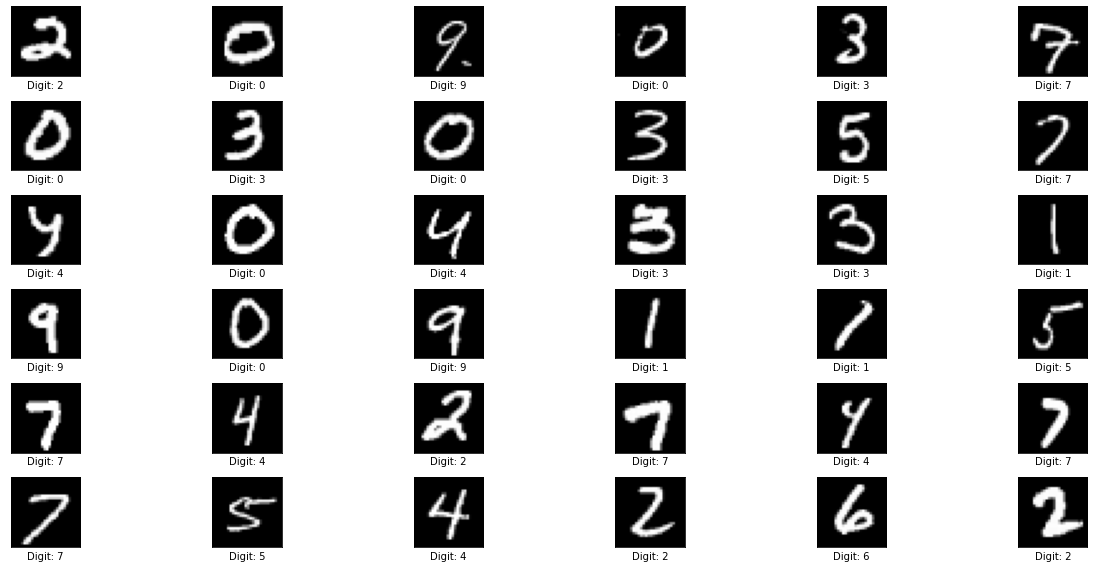

In [36]:
fig = plt.figure(figsize=(20,8))

for images in range(36):
    fig.add_subplot(6, 6, images+1)
    plt.xticks([])
    plt.yticks([]) 
    plt.imshow(test[images], cmap="gray")            # data is on our unseen test dataset
    plt.xlabel('Digit: ' + str(final_pred[images]))  # tag along with our final prediction to see how well it got it right.
    plt.tight_layout() # to see clear graph
plt.show();

In [37]:
# Creating Submission File

submissions = pd.read_csv("sample_submission.csv")
submissions['Label'] = final_pred
submissions.to_csv('submission.csv', index = False)